<a href="https://colab.research.google.com/github/Wiz80/Deep-Learning/blob/master/SVM_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Linear Classifier using SVM
This will be a classifier of flowers usign scikit-learn 

In [3]:
import numpy as np
from sklearn import datasets
'''
Pipeline sirve como estimador, esta encargado en este caso de
construir el modelo 
'''
from sklearn.pipeline import Pipeline
'''
SVM es sensible a las escalas de los datos por esta razón se debe
aplicar normalización de los datos
'''
from sklearn.preprocessing import StandardScaler
'''
En los datos pueden existir OUTLIERS los cuales pueden hacer
que el algoritmo haga overfitting, para evitar esto Scikit-learn
usa un parámetro que permite la entrada de outliers y que se haga
una mejor separación de los datos
'''
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

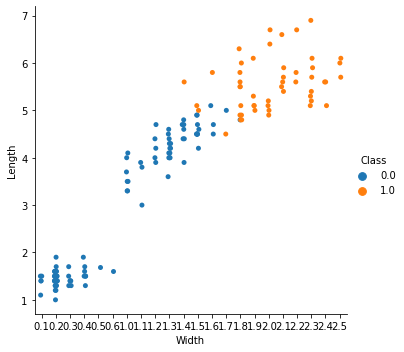

In [ ]:
iris = datasets.load_iris()
X = iris['data'][:, (2,3)] 
#Sólo se escogen como features el petal length y el petal width
y = (iris['target'] == 2).astype(np.float64)
#En el dataset se escoge un target a separar por el algoritmo
#En este caso Iris-Virginica será la flor a clasificar
data = {'Length': X[:,0],
        'Width': X[:,1],
        'Class': y}

df = pd.DataFrame(data)
p = sns.catplot(x = 'Width', y = 'Length', hue = "Class", data = df)

In [ ]:
svm_clf = Pipeline([
          ('scaler', StandardScaler()),
          ('linear_svc', LinearSVC(C = 1, loss = 'hinge'))
])

"""
La función de pérdida 'hinge' es la que permite aplicar la función
de costo del SVM con la característica de permitir un parámetro
adicional C para aumentar o disminuir la aceptación de outliers
"""
svm_clf.fit(X,y)

In [ ]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

##Non-Linear Classifier using SVM with linear SVC

For try a classifier using SVM with non-linear dataset caracteristic patterns we use polynomial features from Scikit-Learn 

In [6]:
from sklearn.datasets import make_moons #dataset
from sklearn.preprocessing import PolynomialFeatures

<Figure size 1440x720 with 0 Axes>

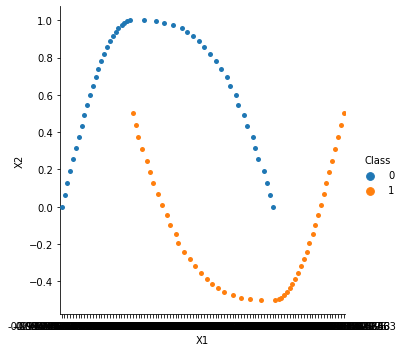

In [7]:
X, y= make_moons()
data = {'X1': X[:,0],
        'X2': X[:,1],
        'Class': y}

df = pd.DataFrame(data)
plt.figure(figsize=(20, 10))
p = sns.catplot(x = 'X1', y = 'X2', hue = "Class", data = df)
plt.show()

In [ ]:
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree= 3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C = 10, loss = "hinge"))
])
polynomial_svm_clf.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [ ]:
print(np.mean(data['X1']))
print(np.mean(data['X2']))

0.5
0.25


In [ ]:
polynomial_svm_clf.predict([[0.5, 0.25]])

array([0])

##Non-linear classification using SVM with polynomial Kernel

El algoritmo anterior tiene problemas de performance cuando el dataset es muy grande debido a que puede crear una gran variedad de combinación de features que hace que sea computacionalmente lento

In [1]:
from sklearn.svm import SVC

In [10]:
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = "poly", degree = 3, coef0 = 1, C= 5))
])
"""
Se usa un kernel de tercer grado polinomial y dependiendo de su 
performance puede estar presentando overfitting o underfitting,
coef0 representa que tanto el modelo se deja afectar por valores polinomiales
altos vs valores polinomiales bajos
"""
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [9]:
poly_kernel_svm_clf.predict([[0.5, 0.25]])

array([1])

##Gaussian RBF kernel

In [11]:
rbf_kernel_svm_clf = Pipeline([
     ("scaler", StandardScaler()),
     ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
]) 
rbf_kernel_svm_clf.fit(X, y) 

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

In [12]:
rbf_kernel_svm_clf.predict([[0.5, 0.25]])

array([0])

" So γ  acts like a regularization hyperparameter: if your model is overfitting, you should reduce it, and if it is under‐ fitting, you should increase it (similar to the C hyperparameter). "